In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import graphviz
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Decision Trees

 * Learn a hierarchy of if/else questions, leading to a decision.
 * In the machine learning setting, these questions are called **tests**.
 * Usually data does not come in the form of binary yes/no features. Tests that are used on continuous data are of the form “Is feature i larger than value a?”
 * To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.
 * Splitting the dataset vertically at x[1]=0.0596 yields the most information; it best separates the points in class 1 from the points in class 2.

<img src="img/dec_tree1.png" alt="Drawing" style="width: 700px;"/>

 * The top node the root, represents the whole dataset, consisting of 50 points belonging to class 0 and 50 points belonging to class 1.
 * If the test is true, a point is assigned to the left node, which contains 2 points belonging to class 0 and 32 points belonging to class 1.
 * We can build a more accurate model by repeating the process of looking for the best test in both regions.
 
<img src="img/dec_tree2.png" alt="Drawing" style="width: 900px;"/>

 * A leaf of the tree that contains data points that all share the same target value is called **pure**.
 * A prediction on a new data point is made by checking which region of the partition of the feature space the point lies in, and then predicting the majority target in that region.

## Prevent overfitting

 * Stopping the creation of the tree early - **pre-pruning**.
 * Building the tree but then removing leaves that contain little information **post-pruning**.

In [2]:
# data
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# init model
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

# model performance
print('Decision Tree Train Accuracy: {:.3f}'.format(tree.score(X_train, y_train)))
print('\nDecision Tree Test Accuracy: {:.3f}'.format(tree.score(X_test, y_test)))

Decision Tree Train Accuracy: 1.000

Decision Tree Test Accuracy: 0.937


As expected, the accuracy on the training set is 100%—because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data.

Let's preprune the tree using **depth**:

In [3]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)

print('Decision Tree Train Accuracy: {:.3f}'.format(tree.score(X_train, y_train)))
print('\nDecision Tree Test Accuracy: {:.3f}'.format(tree.score(X_test, y_test)))

Decision Tree Train Accuracy: 0.988

Decision Tree Test Accuracy: 0.951


## Plotting the trees

In [4]:
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
    feature_names=cancer.feature_names, impurity=False, filled=True)

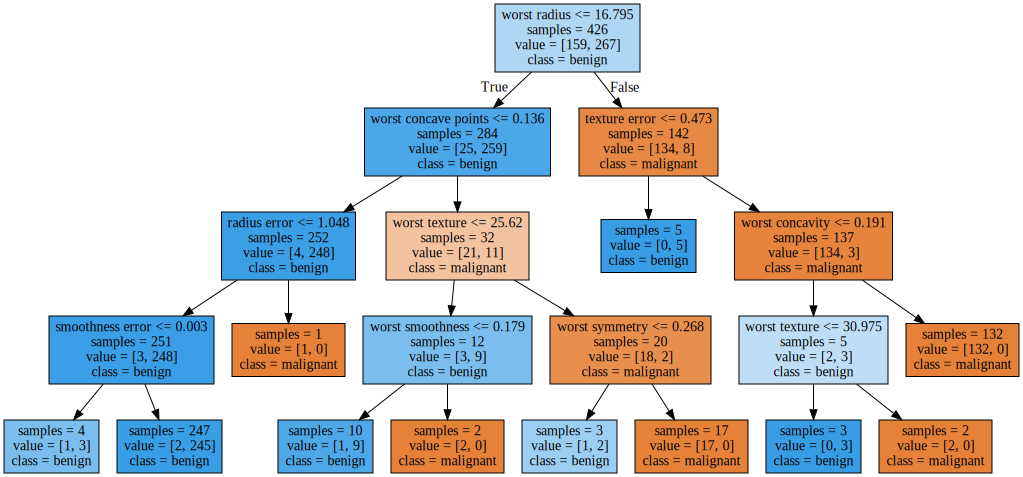

In [5]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

convert .dot file to png or pdf format in the terminal:<br>
`$ dot -Tpng iris_tree.dot -o iris_tree.png`

Since it is overwhelming even to grasp depth = 4 tree, one method of inspecting the tree is to take the path which most of the data follows. Of the 142 samples that went to the right in the initial split, nearly all of them (132) end up in the leaf to the very right.

## Feature importance in trees

 * Feature importance is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:

In [6]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


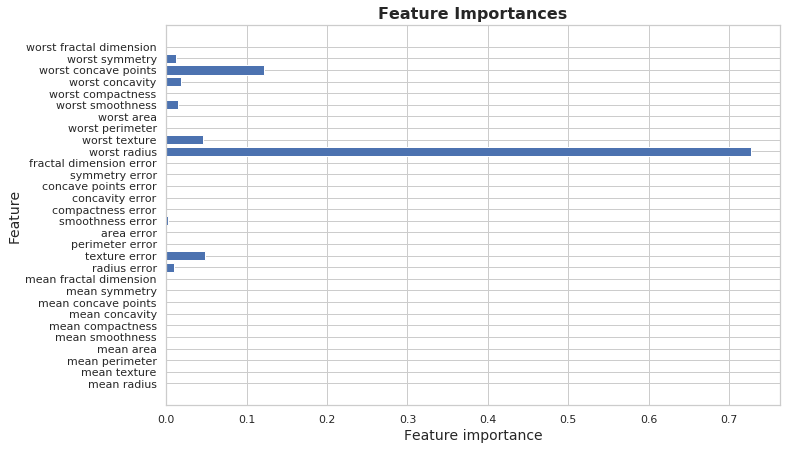

In [17]:
# plotting the importances
n_features = cancer.data.shape[1]
sns.set(style='whitegrid')
plt.figure(figsize=(11, 7))
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Feature Importances", fontsize=16, weight='bold')
plt.show()

 * If a feature has a low feature_importance , it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information.
 * The feature importances tell us that “worst radius” is important, but not whether a high radius is indicative of a sample being benign or malignant.

## Decision Boundries

* train decision tree on two moons dataset

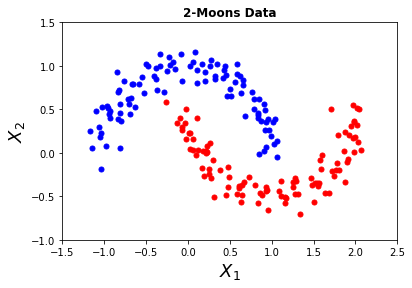

In [2]:
# import data
X, y = datasets.make_moons(n_samples=200, noise=0.1, random_state=0)

# create function to plot the two-moon dataset
def plot_moons(X, y, axes):
    #plt.figure(figsize=(10,6))
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='blue', marker='.', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='red', marker='.', s=100)
    plt.axis(axes)
    plt.xlabel(r'$X_1$', fontsize=18)
    plt.ylabel(r'$X_2$', fontsize=18)
    plt.title('2-Moons Data', weight='bold')
    
plot_moons(X, y, axes=[-1.5, 2.5, -1, 1.5])
plt.show()

In [4]:
axes = [-1.5, 2.5, -1, 1.5]

def plot_dec_boundries(clf, axes):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X = np.c_[x1.ravel(), x2.ravel()]
    
    y_pred = clf.predict(X).reshape(x1.shape)
    
    blue_red_cmap = ListedColormap(['#0000ff', '#ff0000'])
    plt.contourf(x1, x2, y_pred, cmap=blue_red_cmap, alpha=0.2)

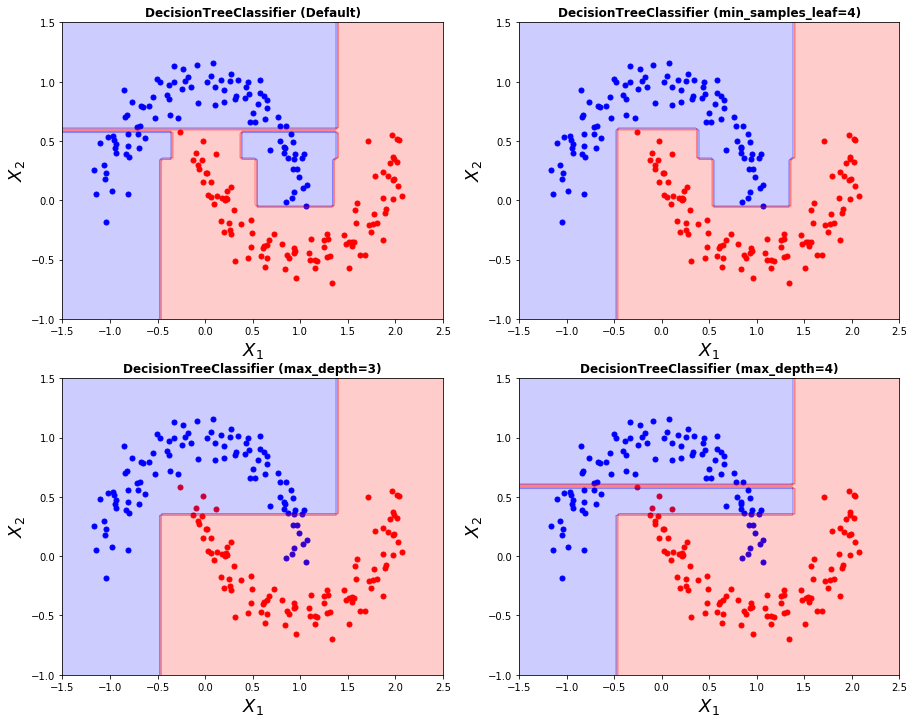

In [13]:
dt_default_clf = DecisionTreeClassifier(random_state=0).fit(X, y)
dt_maxdepth3_clf = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X, y)
dt_minsamples_clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=4).fit(X, y)
dt_maxdepth2_clf = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X, y)

plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)

plot_moons(X, y, axes)
plot_dec_boundries(dt_default_clf, axes)
plt.title('DecisionTreeClassifier (Default)', weight='bold')

plt.subplot(2,2,2)

plot_moons(X, y, axes)
plot_dec_boundries(dt_minsamples_clf, axes)
plt.title('DecisionTreeClassifier (min_samples_leaf=4)', weight='bold')

plt.subplot(2,2,3)

plot_moons(X, y, axes)
plot_dec_boundries(dt_maxdepth3_clf, axes)
plt.title('DecisionTreeClassifier (max_depth=3)', weight='bold')

plt.subplot(2,2,4)

plot_moons(X, y, axes)
plot_dec_boundries(dt_maxdepth2_clf, axes)
plt.title('DecisionTreeClassifier (max_depth=4)', weight='bold')

plt.show()

## Summary

Pros:
 + Prepruning strategies: **max_depth** , **max_leaf_nodes** , or **min_samples_leaf** are sufficient to prevent overfitting.
 + The resulting model can **easily be visualized and understood/explained** by nonexperts.
 + The algorithms are completely **invariant to scaling** of the data.
 + <font color='red'>**No**</font> preprocessing like **normalization or standardization** of features is needed for decision tree algorithms.
 + Decision trees work well when you have features that are on completely different scales, or a mix of binary and continuous features.
 
Cons:
 * Even with the use of pre-pruning, they tend to overfit and provide **poor generalization** performance.
 * Decision boundaries are orthogonal to the axes, making them sensitive to training set rotation

### Exercise

Train and fine-tune a Decision Tree for the moons dataset.<br>
1. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).
2. Split it into a training set and a test set using train_test_split().
3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.
4. Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

In [15]:
# 1. generate the data
X, y = datasets.make_moons(n_samples=10000, noise=0.4, random_state=0)

# 2. split data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [24]:
param_grid = {'max_leaf_nodes': np.arange(2, 100, 4),
              'min_samples_split': [2, 4]}

clf = DecisionTreeClassifier()

grid = GridSearchCV(clf, param_grid, cv=3, iid=False, return_train_score=False,
                    n_jobs=-1).fit(X_train, y_train)

In [25]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
print('DecisionTreeClassifier accuracy: {:.3f}'.format(grid.best_estimator_.score(X_test, y_test)))

DecisionTreeClassifier accuracy: 0.856


# Ensambles of Decision Trees
## Random forests

 * Main drawback of decision trees is that they tend to overfit the training data. 
 * Random forests are one way to address this problem.
 * Random forest is essentially a collection of decision trees, where each tree is slightly different from the others.
 * Averageing many trees, so we cut down on ovrfitting since each tree does little bit differently. 
 * Random forests get their name from injecting randomness into the tree building to ensure each tree is different.
 * Two ways in which the trees in a random forest are randomized: by selecting the data points used to build a tree and by selecting the features in each split test.
 * A critical parameter - **max_features**. If we set it to n_features, it means that each split can look at all features in the dataset, and no randomness will be injected in the feature selection.
 * If we set max_features to 1 , that means that the splits have no choice at all on which feature to test, and can only search over different thresholds for the feature that was selected randomly.
 * A low max_features means that the trees in the random forest will be quite different, and that each tree might need to be very deep in order to fit the data well.

In [27]:
# raw data from sklearn
X, y = datasets.make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

The trees that are built as part of the random forest are stored in the **estimator_** attribute. Let’s visualize the decision boundaries learned by each tree, together with their aggregate prediction as made by the forest.

<img src="img/rand_forest.png" alt="Drawing" style="width: 900px;"/>

 * The decision boundaries learned by the five trees are quite different.
 * The random forest overfits less than any of the trees individually.
 
### Feature Importances

Let’s apply a random forest consisting of 100 trees on the Breast Cancer dataset

In [28]:
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

print("Random Forest Training Set Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
print("Random Forest Test Set Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Random Forest Training Set Accuracy: 1.000
Random Forest Test Set Accuracy: 0.972


Feature importances are more accurate on the forest rather than on single tree.

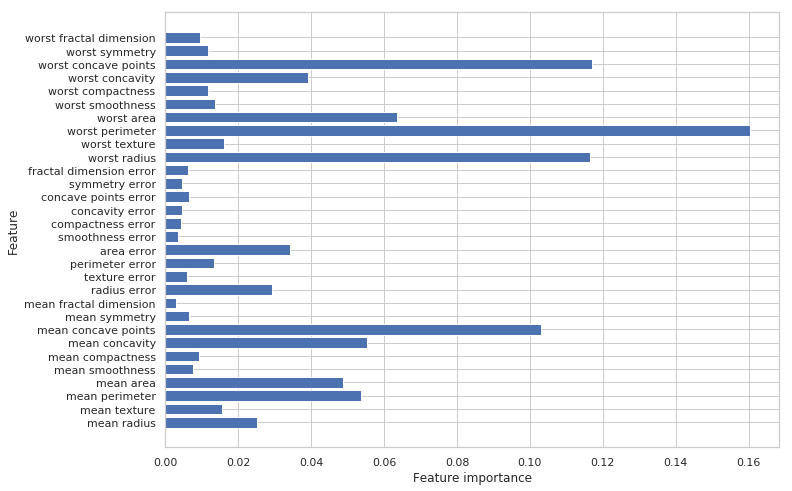

In [30]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(11, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(forest)

### Extra-Trees

* While RandomForestClassifiers are searching for best possible thresholds for each feature, one can grow even more random trees **Extremely Randomized Trees** 
* These trees use random thresholds for features
* Such tactic trades higher bias for lower variance 
* *Extra-Trees* are also much faster than regular decision trees since finding the best possible threshold for each node is one of the most time-consuming tasks of growing a tree
* In sklearn there is `ExtraTreesClassifer` class.

<img src="img/extra_trees.png" alt="Drawing" style="width: 600px;"/>

Text captured from *"Hands-On Machine Learning with Scikit-Learn & TensorFlow"* by Aurélien Géron

The random forest also gives a lot of importance to the “worst radius” feature, but it actually chooses “worst perimeter” to be the most informative feature overall.

## Summary
Pros:

 * Random forests are most widely used machine learning methods.
 * Without heavy tuning of the parameters
 * Don’t require scaling of the data
 * Work well even on very large datasets
 * For n_estimators , larger is always better.
 * Common rule of thumb is to build “as many as you have time/memory for.”

Cons:
 * Don’t tend to perform well on very high dimensional, sparse data, such as text data.
 * If time and memory are important in an application, it might make sense to use a linear model instead.
 
In general, it’s a good rule of thumb to use the **default** values: **max_features=sqrt(n_features)** for classification and **max_features=log2(n_features)** for regression. Adding max_features or max_leaf_nodes might sometimes improve performance.

## Gradient boosted regression trees

 * these models can be used for regression and classification.
 * building trees in a serial manner, where each consequtive tree is applied to training instances where predecessor made a mistake
 * By default, no randomization
 * strong pre-pruning is used
 * use shallow trees, of depth one to five, makes the model smaller and makes predictions faster
 * a bit more sensitive to parameter settings than random forests
 * important parameter of gradient boosting is the **learning_rate**, apart from pre-pruning and n_estimators
 
**learning rate** : controls how strongly each tree tries to correct the mistakes of the previous trees. A higher learning rate means each tree can make stronger corrections, allowing for more complex models.

By default, 100 trees of maximum depth 3 and a learning rate of 0.1 are used:

In [34]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [35]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [36]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [37]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


### Visualize feature importances

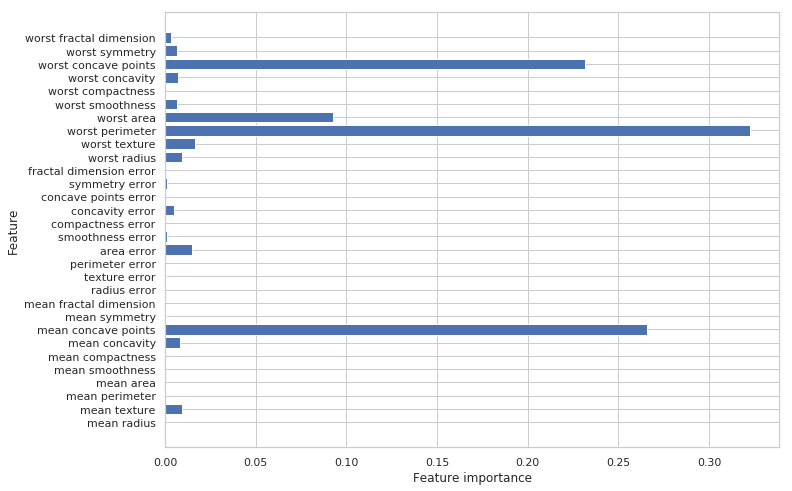

In [38]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

## Summary

 * A common approach is to first try random forests, which work quite robustly.
 * If it is important to squeeze out the last percentage of accuracy from the machine learning model, moving to gradient boosting often helps

Pros:
 * works well without scaling and on a mixture of binary and continuous features

Cons:
 * they require careful tuning of the parameters and may take a long time to train
 * does not work well on high-dimensional sparse data